# Exploring San Francisco Summer 2014 Crime Data

Linghao Zhang <zlhdnc1994@gmail.com>

## Conclusion

### 1. Incidents of crimes happen most frequently from mid-afternoon to mid-night, with a peak during 16:00pm to 20:00pm.

### 2. The cause of this peak may be attributed to the frequent occurence of thefts during this time period.

## Preparation

First import some packages and do some set-ups.

In [347]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

color_cycle = plt.rcParams['axes.color_cycle']

Note that in the original dataset date and time columns are separated. Here I combine them for the convenience of later operations.

In [348]:
sfo_data = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')
sfo_data['Datetime'] = sfo_data.Date + ' ' + sfo_data.Time

In [349]:
sfo_date_index = pd.DatetimeIndex(sfo_data.Datetime)
sfo_data['date'] = sfo_date_index.date.astype('datetime64')
sfo_data['month'] = sfo_date_index.month
sfo_data['weekend'] = (sfo_date_index.dayofweek > 4)
sfo_data['hour'] = sfo_date_index.hour

## Hourly Trends

First let's see how are incidents distributed over a day. I plot the hourly trends for both weekdays and weekends. We can see clearly from the plot that trends are roughly the same over the week, and that a great number of incidents happen in the afternoon and night. The peak of the plot comes at around 18:00pm, which is the dinner time.

In [351]:
hourly = sfo_data.pivot_table('IncidntNum', aggfunc='count', index=['date'], columns=['weekend', 'hour'])

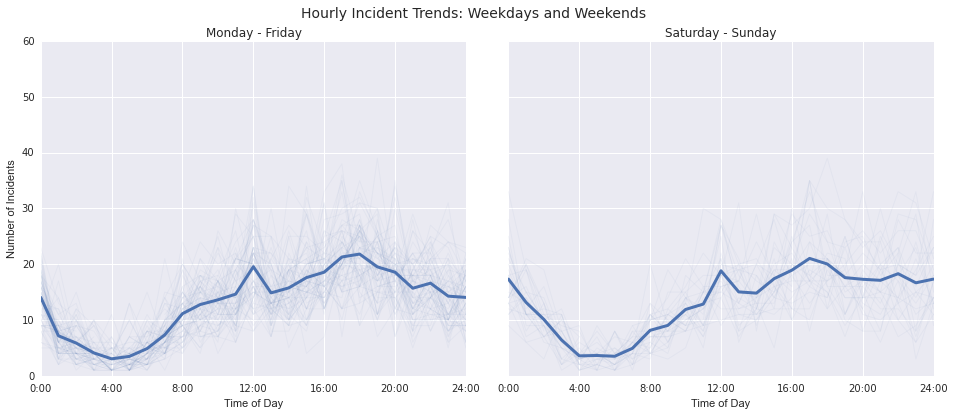

In [352]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.1)
fmt = plt.FuncFormatter(lambda x, *args: '{0}:00'.format(int(x)))

for weekend in (False, True):
    axi = ax[int(weekend)]
    vals = hourly[weekend].values
    vals = np.hstack([vals, vals[:, :1]])
    axi.plot(range(25), vals.T, color=color_cycle[0], lw=1, alpha=0.05)
    axi.plot(range(25), np.nanmean(vals, 0), color=color_cycle[0], lw=3)
    axi.xaxis.set_major_locator(plt.MultipleLocator(4))
    axi.xaxis.set_major_formatter(fmt)
    axi.set_ylim(0, 60)
    axi.set_title('Saturday - Sunday' if weekend else 'Monday - Friday')
    axi.legend(loc='upper left')
    axi.set_xlabel('Time of Day')
ax[0].set_ylabel('Number of Incidents')
fig.suptitle('Hourly Incident Trends: Weekdays and Weekends', size=14);

fig.savefig('Figures/hourly_trend.png', bbox_inches='tight')

## Hourly Trends by Month

Next let's compare the hourly trends of different months. Here I plot the trends for June, July and August. Not very interestingly, the distributions don't seem to differ very much.

In [353]:
monthly_hourly = sfo_data.pivot_table('IncidntNum', aggfunc='count', index=['date'],
                                                columns=['month', 'hour'])

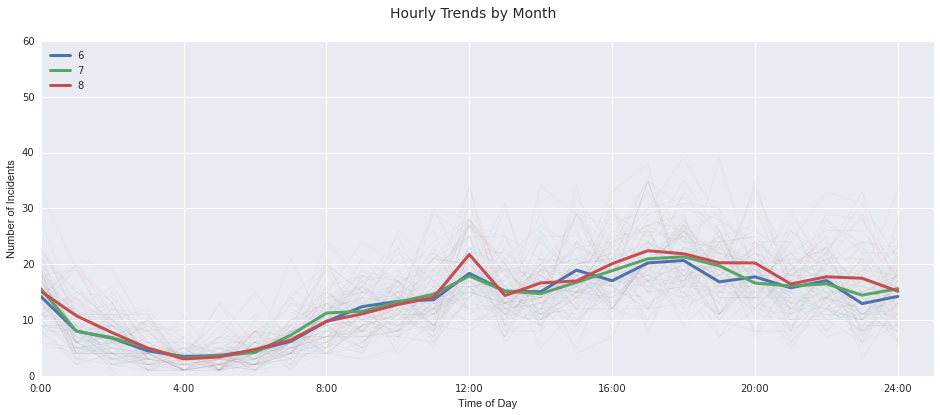

In [354]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6), sharex=True, sharey=True)
fmt = plt.FuncFormatter(lambda x, *args: '{0}:00'.format(int(x)))

axi = ax
for i, col in enumerate([6, 7, 8]):
    vals = monthly_hourly[col].values
    vals = np.hstack([vals, vals[:, :1]])
    axi.plot(range(25), vals.T,
             color=color_cycle[i], lw=1, alpha=0.05)
    axi.plot(range(25), np.nanmean(vals, 0),
             color=color_cycle[i], lw=3, label=col)
axi.xaxis.set_major_locator(plt.MultipleLocator(4))
axi.xaxis.set_major_formatter(fmt)
axi.set_ylim(0, 60)
axi.legend(loc='upper left')
axi.set_xlabel('Time of Day')
ax.set_ylabel('Number of Incidents')
fig.suptitle('Hourly Trends by Month', size=14);

fig.savefig('Figures/hourly_trend_month.png', bbox_inches='tight')

## Hourly Trends by Category

So what causes the peak during 16:00pm to 20:00pm? I want to find out what specific type of crimes contribute to that peak.

In [355]:
hourly_category = sfo_data.pivot_table('IncidntNum', aggfunc='count', index=['date'],
                                                columns=['Category', 'hour'])
hourly_category = hourly_category.fillna(0)
crime_categories = sfo_data.Category.unique()

First I try to find out the top 5 frequent crimes in the datasets

In [358]:
crime_sorted = sorted([(sfo_data[sfo_data.Category == c].count()[0], c) for c in crime_categories], reverse=True)
crime_top5 = zip(*crime_sorted[:5])[1]
crime_top5

('LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT', 'VEHICLE THEFT')

Then I plot the data. We can see that apart from thefts, other types of crimes are quite scarce and pretty spread out. But the plot for thefts turns out to be quite consistent with the general trends plotted above. It should be safe to draw the conclusion that it is mainly **thefts** that contribute to this distribution.

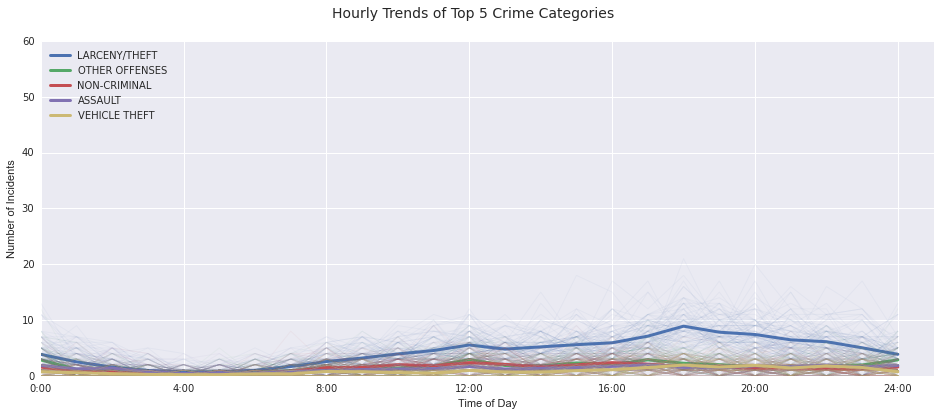

In [357]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6), sharex=True, sharey=True)
fmt = plt.FuncFormatter(lambda x, *args: '{0}:00'.format(int(x)))

axi = ax
for i, col in enumerate(crime_top5):
    try:
        vals = hourly_category[col].values
        vals = np.hstack([vals, vals[:, :1]])
        axi.plot(range(len(vals.T)), vals.T,
                 color=color_cycle[i], lw=1, alpha=0.05)
        axi.plot(range(len(vals.T)), np.nanmean(vals, 0),
                 color=color_cycle[i], lw=3, label=col)
    except:
        print i
        raise
axi.xaxis.set_major_locator(plt.MultipleLocator(4))
axi.xaxis.set_major_formatter(fmt)
axi.set_ylim(0, 60)
axi.legend(loc='upper left')
axi.set_xlabel('Time of Day')
ax.set_ylabel('Number of Incidents')
fig.suptitle('Hourly Trends of Top 5 Crime Categories', size=14);

fig.savefig('Figures/hourly_trend_category.png', bbox_inches='tight')